In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [61]:
hyd=pd.read_csv("hyd.csv",index_col="DATE")

In [62]:
hyd.head()

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2000-01-01,IN001080500,"BEGUMPET OBSERVATORY, IN",0.0,71,82.0,60.0
2000-01-02,IN001080500,"BEGUMPET OBSERVATORY, IN",0.0,68,81.0,NaN
2000-01-03,IN001080500,"BEGUMPET OBSERVATORY, IN",0.0,67,83.0,NaN
2000-01-04,IN001080500,"BEGUMPET OBSERVATORY, IN",0.0,69,83.0,53.0
2000-01-05,IN001080500,"BEGUMPET OBSERVATORY, IN",0.0,69,83.0,55.0


In [63]:
#check whether there any missing values inthe file to get in percentage use /as shown below
hyd.apply(pd.isnull).sum()/hyd.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.612447
TAVG       0.000000
TMAX       0.226179
TMIN       0.350420
dtype: float64

In [64]:
#here we can choose  (or)take which data should have present in your dataset
#let  create another one
weather= hyd[["PRCP",'TAVG','TMAX','TMIN']].copy()

In [65]:
weather.columns=['PRCP','TAVG','TMAX','TMIN']

In [66]:
weather

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2000-01-01,0.0,71,82.0,60.0
2000-01-02,0.0,68,81.0,NaN
2000-01-03,0.0,67,83.0,NaN
2000-01-04,0.0,69,83.0,53.0
2000-01-05,0.0,69,83.0,55.0
...,...,...,...,...
2023-06-13,0.0,92,102.0,80.0
2023-06-14,NaN,92,103.0,81.0
2023-06-15,NaN,92,102.0,80.0


# filling missing values


In [67]:
#check how many of them are missing 
#we can use isnull to check if there is a false value it is defined as missing
weather.isnull()

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2000-01-01,False,False,False,False
2000-01-02,False,False,False,True
2000-01-03,False,False,False,True
2000-01-04,False,False,False,False
2000-01-05,False,False,False,False
...,...,...,...,...
2023-06-13,False,False,False,False
2023-06-14,True,False,False,False
2023-06-15,True,False,False,False


In [68]:
#to get in numericals use
weather.isnull().sum()/weather.shape[0]

PRCP    0.612447
TAVG    0.000000
TMAX    0.226179
TMIN    0.350420
dtype: float64

In [69]:
weather['PRCP'].value_counts()

0.00    1715
0.08     153
0.04     150
0.02     145
0.01     141
        ... 
3.78       1
0.26       1
2.68       1
4.80       1
2.48       1
Name: PRCP, Length: 98, dtype: int64

In [70]:
#to fill missing values use fillna by o other wise use another method
weather.fillna(0)

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2000-01-01,0.0,71,82.0,60.0
2000-01-02,0.0,68,81.0,0.0
2000-01-03,0.0,67,83.0,0.0
2000-01-04,0.0,69,83.0,53.0
2000-01-05,0.0,69,83.0,55.0
...,...,...,...,...
2023-06-13,0.0,92,102.0,80.0
2023-06-14,0.0,92,103.0,81.0
2023-06-15,0.0,92,102.0,80.0


In [71]:
weather.isnull().sum()

PRCP    5245
TAVG       0
TMAX    1937
TMIN    3001
dtype: int64

In [72]:
weather= weather.fillna(method='ffill')

In [73]:
weather.apply(pd.isnull).sum()/weather.shape[0]

PRCP    0.0
TAVG    0.0
TMAX    0.0
TMIN    0.0
dtype: float64

#  verifying are they correct datatypes


In [77]:
weather.dtypes

PRCP    float64
TAVG      int64
TMAX    float64
TMIN    float64
dtype: object

In [75]:
weather.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11', '2023-06-12',
       '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17'],
      dtype='object', name='DATE', length=8564)

In [76]:
weather.index= pd.to_datetime(weather.index)

In [78]:
weather.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11',
               '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-17'],
              dtype='datetime64[ns]', name='DATE', length=8564, freq=None)

In [79]:
weather.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', name='DATE', length=8564)

In [80]:
weather.apply(lambda x: (x==9999).sum())

PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

<Axes: xlabel='DATE'>

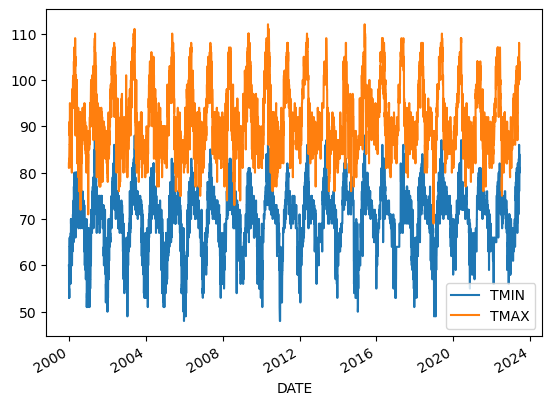

In [84]:
weather[['TMIN','TMAX']].plot()

In [85]:
weather.index.year.value_counts().sort_index()

2000    366
2001    365
2002    364
2003    364
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    362
2022    365
2023    168
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

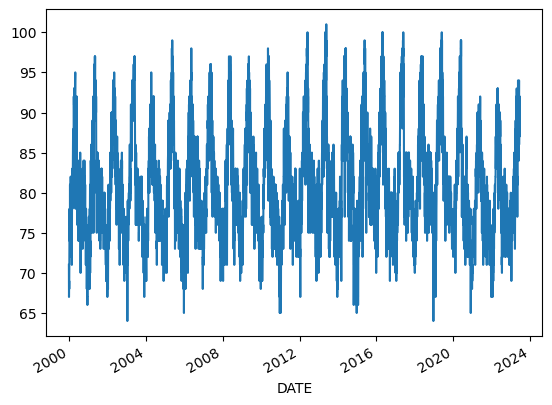

In [92]:
weather['TAVG' ].plot()

# training our model


In [97]:
#create a target 
weather['target']= weather.shift(-1)["TMAX"]

In [98]:
weather

,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,
2000-01-01,0.0,71,82.0,60.0,81.0
2000-01-02,0.0,68,81.0,60.0,83.0
2000-01-03,0.0,67,83.0,60.0,83.0
2000-01-04,0.0,69,83.0,53.0,83.0
2000-01-05,0.0,69,83.0,55.0,83.0
...,...,...,...,...,...
2023-06-13,0.0,92,102.0,80.0,103.0
2023-06-14,0.0,92,103.0,81.0,102.0
2023-06-15,0.0,92,102.0,80.0,102.0


In [99]:
weather=weather.iloc[:-1,:].copy()

In [100]:
weather

,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,
2000-01-01,0.00,71,82.0,60.0,81.0
2000-01-02,0.00,68,81.0,60.0,83.0
2000-01-03,0.00,67,83.0,60.0,83.0
2000-01-04,0.00,69,83.0,53.0,83.0
2000-01-05,0.00,69,83.0,55.0,83.0
...,...,...,...,...,...
2023-06-12,0.08,90,100.0,80.0,102.0
2023-06-13,0.00,92,102.0,80.0,103.0
2023-06-14,0.00,92,103.0,81.0,102.0


In [101]:
from sklearn.linear_model import Ridge
reg= Ridge(alpha=.1)

In [102]:
predictors=["PRCP",'TMAX','TMIN']


In [103]:
#divide the data into test and train
train=weather.loc[:'2020-12-31']
test= weather.loc['2021-01-01':]

In [104]:
reg.fit(train[predictors],train['target'])


Ridge(alpha=0.1)

In [105]:
predictions= reg.predict(test[predictors])
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['target'],predictions)

1.4760777320928302

In [106]:
weather

,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,
2000-01-01,0.00,71,82.0,60.0,81.0
2000-01-02,0.00,68,81.0,60.0,83.0
2000-01-03,0.00,67,83.0,60.0,83.0
2000-01-04,0.00,69,83.0,53.0,83.0
2000-01-05,0.00,69,83.0,55.0,83.0
...,...,...,...,...,...
2023-06-12,0.08,90,100.0,80.0,102.0
2023-06-13,0.00,92,102.0,80.0,103.0
2023-06-14,0.00,92,103.0,81.0,102.0


In [108]:
#by using this we can see differ between values
combined= pd.concat([test['target'],pd.Series(predictions,index=test.index)],axis=1)

In [110]:
combined.columns=['prediction','actual']
combined

,prediction,actual
DATE,,
2021-01-01,80.0,80.589107
2021-01-02,82.0,80.772984
2021-01-03,82.0,82.581569
2021-01-04,82.0,82.673507
2021-01-05,86.0,82.765445
...,...,...
2023-06-12,102.0,99.673949
2023-06-13,103.0,101.494857
2023-06-14,102.0,102.445118


<Axes: xlabel='DATE'>

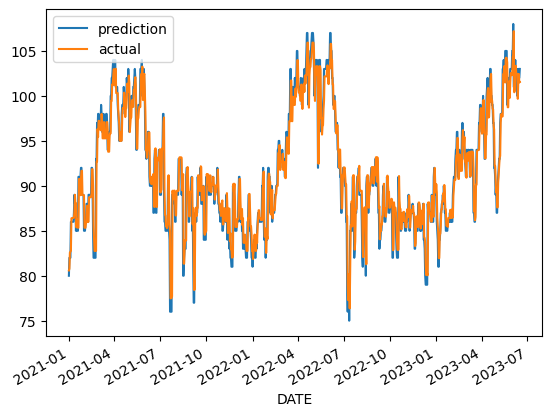

In [111]:
combined.plot()

In [112]:
reg.coef_

array([-0.15404004,  0.9042921 ,  0.04596923])

In [119]:
def create_predictions(predictors,weather,reg):
    train=weather.loc[:'2020-12-31']
    test= weather.loc['2021-01-01':]
    reg.fit(train[predictors],train['target'])
    predictions= reg.predict(test[predictors])
    error=mean_absolute_error(test['target'],predictions)
    combined= pd.concat([test['target'],pd.Series(predictions,index=test.index)],axis=1)
    combined.columns=['prediction','actual']
    return error,combined


    
    

In [134]:
weather["month_max"]=weather['TMAX'].rolling(30).mean()

In [135]:
weather

,PRCP,TAVG,TMAX,TMIN,target,month_max,month_day_max,month_avg
DATE,,,,,,,,
2000-03-01,0.00,82,92.0,62.0,96.0,NaN,0.963768,NaN
2000-03-02,0.00,82,96.0,62.0,98.0,NaN,0.926042,NaN
2000-03-03,0.00,81,98.0,65.0,98.0,NaN,0.909864,NaN
2000-03-04,0.00,82,98.0,65.0,97.0,NaN,0.912245,NaN
2000-03-05,0.00,83,97.0,66.0,95.0,NaN,0.923711,NaN
...,...,...,...,...,...,...,...,...
2023-06-12,0.08,90,100.0,80.0,102.0,102.866667,1.028667,NaN
2023-06-13,0.00,92,102.0,80.0,103.0,102.833333,1.008170,NaN
2023-06-14,0.00,92,103.0,81.0,102.0,102.833333,0.998382,NaN


In [136]:
weather['month_day_max']=weather['month_max']/weather['TMAX']

In [138]:
weather['max_min']=weather['TMAX']/weather['TMIN']

In [139]:
weather=weather.iloc [30:,:].copy()

In [140]:
weather

,PRCP,TAVG,TMAX,TMIN,target,month_max,month_day_max,month_avg,max_min
DATE,,,,,,,,,
2000-03-31,0.00,88,101.0,65.0,96.0,96.833333,0.958746,NaN,1.553846
2000-04-01,0.00,85,96.0,72.0,99.0,96.833333,1.008681,NaN,1.333333
2000-04-02,0.00,84,99.0,74.0,100.0,96.866667,0.978451,NaN,1.337838
2000-04-03,0.00,92,100.0,75.0,103.0,96.933333,0.969333,NaN,1.333333
2000-04-04,0.00,91,103.0,76.0,104.0,97.133333,0.943042,NaN,1.355263
...,...,...,...,...,...,...,...,...,...
2023-06-12,0.08,90,100.0,80.0,102.0,102.866667,1.028667,NaN,1.250000
2023-06-13,0.00,92,102.0,80.0,103.0,102.833333,1.008170,NaN,1.275000
2023-06-14,0.00,92,103.0,81.0,102.0,102.833333,0.998382,NaN,1.271605


In [141]:
predictors=["PRCP",'TMAX','TMIN','month_max','month_day_max','max_min']

In [142]:
weather

,PRCP,TAVG,TMAX,TMIN,target,month_max,month_day_max,month_avg,max_min
DATE,,,,,,,,,
2000-03-31,0.00,88,101.0,65.0,96.0,96.833333,0.958746,NaN,1.553846
2000-04-01,0.00,85,96.0,72.0,99.0,96.833333,1.008681,NaN,1.333333
2000-04-02,0.00,84,99.0,74.0,100.0,96.866667,0.978451,NaN,1.337838
2000-04-03,0.00,92,100.0,75.0,103.0,96.933333,0.969333,NaN,1.333333
2000-04-04,0.00,91,103.0,76.0,104.0,97.133333,0.943042,NaN,1.355263
...,...,...,...,...,...,...,...,...,...
2023-06-12,0.08,90,100.0,80.0,102.0,102.866667,1.028667,NaN,1.250000
2023-06-13,0.00,92,102.0,80.0,103.0,102.833333,1.008170,NaN,1.275000
2023-06-14,0.00,92,103.0,81.0,102.0,102.833333,0.998382,NaN,1.271605


In [143]:
error,combined=create_predictions(predictors,weather,reg)
error

1.459821331495413

<Axes: xlabel='DATE'>

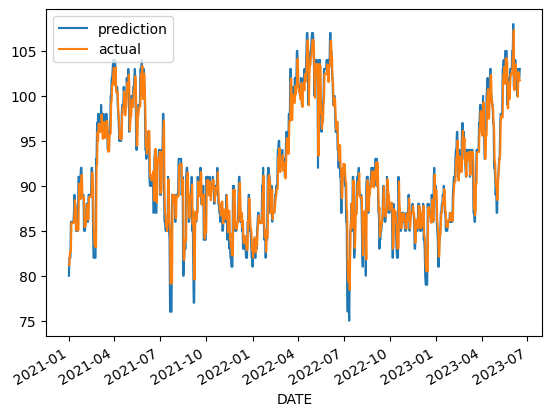

In [144]:
combined.plot()

In [146]:
weather['month_avg']=weather['TMAX'].groupby(weather.index.month).apply(lambda x: x.expanding(1).mean())

In [147]:
weather

,PRCP,TAVG,TMAX,TMIN,target,month_max,month_day_max,month_avg,max_min
DATE,,,,,,,,,
2000-03-31,0.00,88,101.0,65.0,96.0,96.833333,0.958746,101.000000,1.553846
2000-04-01,0.00,85,96.0,72.0,99.0,96.833333,1.008681,96.000000,1.333333
2000-04-02,0.00,84,99.0,74.0,100.0,96.866667,0.978451,97.500000,1.337838
2000-04-03,0.00,92,100.0,75.0,103.0,96.933333,0.969333,98.333333,1.333333
2000-04-04,0.00,91,103.0,76.0,104.0,97.133333,0.943042,99.500000,1.355263
...,...,...,...,...,...,...,...,...,...
2023-06-12,0.08,90,100.0,80.0,102.0,102.866667,1.028667,95.465812,1.250000
2023-06-13,0.00,92,102.0,80.0,103.0,102.833333,1.008170,95.475107,1.275000
2023-06-14,0.00,92,103.0,81.0,102.0,102.833333,0.998382,95.485795,1.271605


In [148]:
reg.coef_

array([-0.3973808 ,  1.31943402,  0.06531595, -0.40043404, 46.17490911,
        2.44704258])

In [149]:
weather.corr()['target']

PRCP            -0.147441
TAVG             0.861984
TMAX             0.933978
TMIN             0.583071
target           1.000000
month_max        0.785049
month_day_max   -0.420509
month_avg        0.800898
max_min          0.131370
Name: target, dtype: float64

<Axes: xlabel='DATE'>

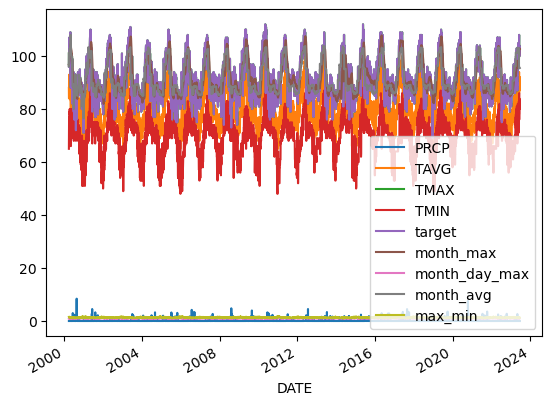

In [150]:
weather.plot()